# warm - up

recursion is the process of a function calling itself directly or indirectly. This is a way to get to the solution of a problem by breaking it into smaller and simpler steps. 

In [1]:
def two_mult(n):
    if n >= n**2:
        print(squrf of n)
    else:
        return two_mult(n*2)
    
    
    
two_mult(5)    

RecursionError: maximum recursion depth exceeded in comparison

# 1. Explore Google Trends https://trends.google.com/ . Find a topic of interest to you with more than a year of trend data, and export it.
a. Import the data into a pandas dataframe

b. Decide whether ARIMA or SARIMA makes more sense for the dataset

c. Run either an ARIMA or SARIMA on it

d. Explain the results

e. Discuss your findings with your group and explain what trend someone else
chose and why they chose the model they did


In [2]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats 
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings('ignore')

from time import time

df = pd.read_csv("multiTimeline 2.csv",index_col =['Week'],parse_dates =['Week'])
df.head()


,daily covid cases: (Worldwide)
Week,
2020-12-06,57
2020-12-13,57
2020-12-20,56
2020-12-27,70
2021-01-03,75


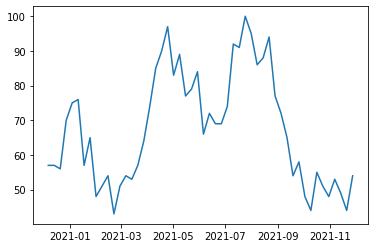

In [3]:

plt.plot(df.index, df['daily covid cases: (Worldwide)']) # non stationary

In [5]:
df.resample('W').mean().head()

,daily covid cases: (Worldwide)
Week,
2020-12-06,57.0
2020-12-13,57.0
2020-12-20,56.0
2020-12-27,70.0
2021-01-03,75.0


<AxesSubplot:xlabel='Week'>

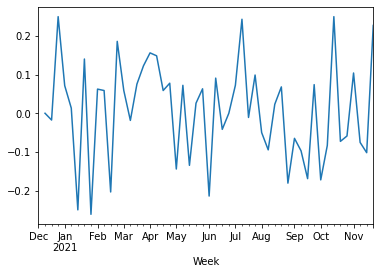

In [6]:
# to transform to a stationary process
df['Return']=df['daily covid cases: (Worldwide)'].pct_change() 
df['Return'].plot()

In [7]:
# autocorrelation
df = df.dropna()

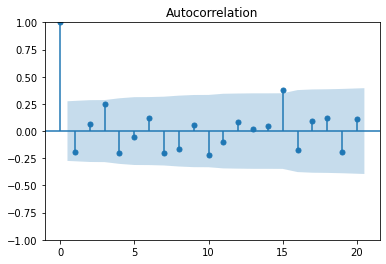

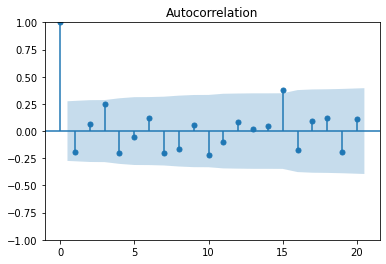

In [8]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(df[['Return']], lags = 20, missing='drop')

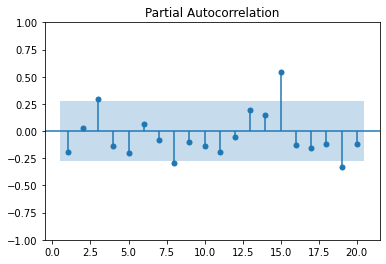

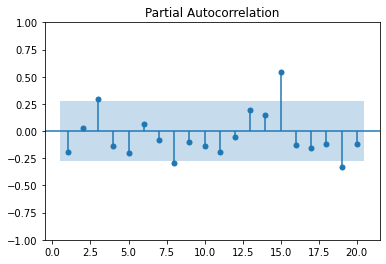

In [64]:
plot_pacf(df[['Return']],zero = False,lags = 20)

In [12]:
import warnings
warnings.filterwarnings('ignore')

from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(df['Return'],order = (1,1,2))

In [13]:
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                 Return   No. Observations:                   51
Model:                 ARIMA(1, 1, 2)   Log Likelihood                  29.973
Date:                Fri, 03 Dec 2021   AIC                            -51.946
Time:                        16:23:54   BIC                            -44.298
Sample:                    12-13-2020   HQIC                           -49.034
                         - 11-28-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2460      0.907     -0.271      0.786      -2.024       1.532
ma.L1         -0.9302      0.814     -1.143      0.253      -2.526       0.665
ma.L2         -0.0648      1.002     -0.065      0.948      -2.029       1.899
sigma2         0.0163      0.011      1.449      0.147      -0.006       0.038
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):                 0.70
Prob(Q):                              0.86   Prob(JB):                         0.71
Heteroskedasticity (H):               0.88   Skew:                            -0.10
Prob(H) (two-sided):                  0.80   Kurtosis:                         2.45
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [14]:
results_df = pd.DataFrame(results.forecast(steps=10))
results_df.head()

,predicted_mean
2021-12-05,-0.034515
2021-12-12,0.016744
2021-12-19,0.004132
2021-12-26,0.007235
2022-01-02,0.006471


<AxesSubplot:title={'center':'Covid Return 10 day Farecast'}>

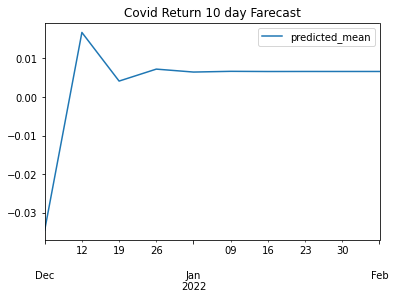

In [15]:
results_df.plot(title = 'Covid Return 10 day Farecast')

# 2. What is a fourier transform? Perform one on y = np.cos(x/2), and both show (with code) and explain the key elements

Fourier transform essentially lets us get information behind every single instant of our signal and then we combine those to get the full information and ofcoure at that point we can analyze it and understand the signal a lot better so 

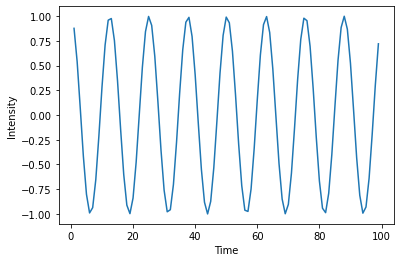

In [65]:
from scipy import signal
x = np.arange(1,100,1)
y = np.cos(x/2)
plt.plot(x,y)
plt.xlabel('Time')
plt.ylabel('Intensity')
plt.show()

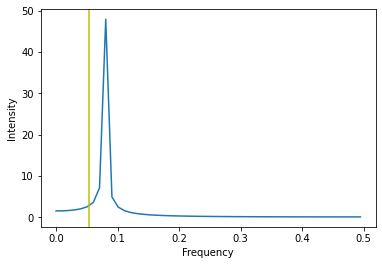

In [66]:
psd = np.abs(np.fft.rfft(y))
freqs = np.fft.rfftfreq(len(y))
plt.plot(freqs,psd)
# amplitude
plt.axvline(1/(6*np.pi),c='y')
plt.xlabel('Frequency')
plt.ylabel('Intensity')
plt.show()